# <a href="https://thetahat.ru/courses/ph-ds-2024-aut">Phystech@DataScience</a>
## Семинар 7 (Часть 1)

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

In [ ]:
# Bot check

# HW_ID: phds_sem7_1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sns
import scipy.stats
from tqdm import tqdm_notebook
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

sns.set(context='poster')
%matplotlib inline

### Задача 1:

Скачайте датасет про классификацию женщин с диабетом. Разделите на трейн и тест.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/diabetes.csv")
# data = datasets.load_diabetes()


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X = data.iloc[:, :-1]
y = data['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Обучите обычное решающее дерево глубины 3. Выведите его графическое представление, а также accuracy на тренировочной и тестовой выборке.

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Посчитайте accuracy

In [ ]:
predictions = clf.predict(X_test)
print('test accuracy:', accuracy_score(predictions, y_test))

test accuracy: 0.7135416666666666


Визуализируйте дерево

In [ ]:
from sklearn import tree

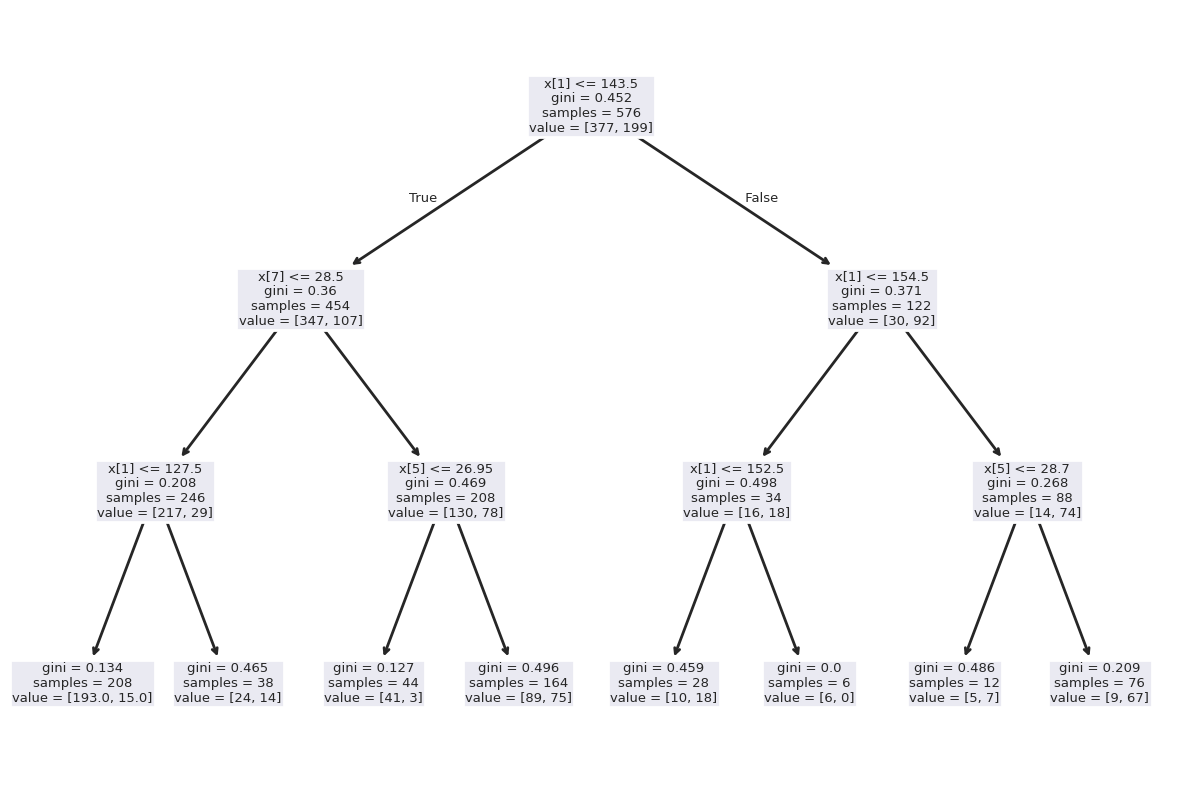

In [ ]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf)
plt.show()

Теперь обучите случайный лес с 100 деревьями.

In [ ]:
n_estimators = 100

clf_forest = RandomForestClassifier(n_estimators = 100, random_state=42)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Выведите параметры леса.

In [ ]:
clf_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Какие параметры уже известны и относятся к решающему дереву?

**Ответ:**
criterion: Критерий, используемый для разделения узлов в решающих деревьях.
max_depth: Максимальная глубина каждого дерева.
min_samples_split: Минимальное количество образцов, необходимое для разделения узла.
min_samples_leaf: Минимальное количество образцов в каждом листе.
max_features: Число признаков, которые рассматриваются при выборе оптимального разделения для каждого узла.



Появляются новые важные гиперпараметры: n_estimators (количество деревьев в лесу). Также важным является гиперапараметр max_features &mdash; максимальное количество признаков, которые могут быть перебраны при разбиении вершины дерева. Перед каждым разбиением дерева генерируется выборка из `min(k, max_features)` случайных признаков (`k` — количество признаков в датасете) и только эти признаки рассматриваются как разделяющие в данной вершине.

Выведите качество, сравните с деревом.

In [ ]:
predictions_forest = clf_forest.predict(X_test)
print('test accuracy:', accuracy_score(predictions_forest, y_test))

test accuracy: 0.734375


**Вывод:**
немного возрастает из-за увеличения количества деревьев

Нарисуйте первые 6 деревьев леса.

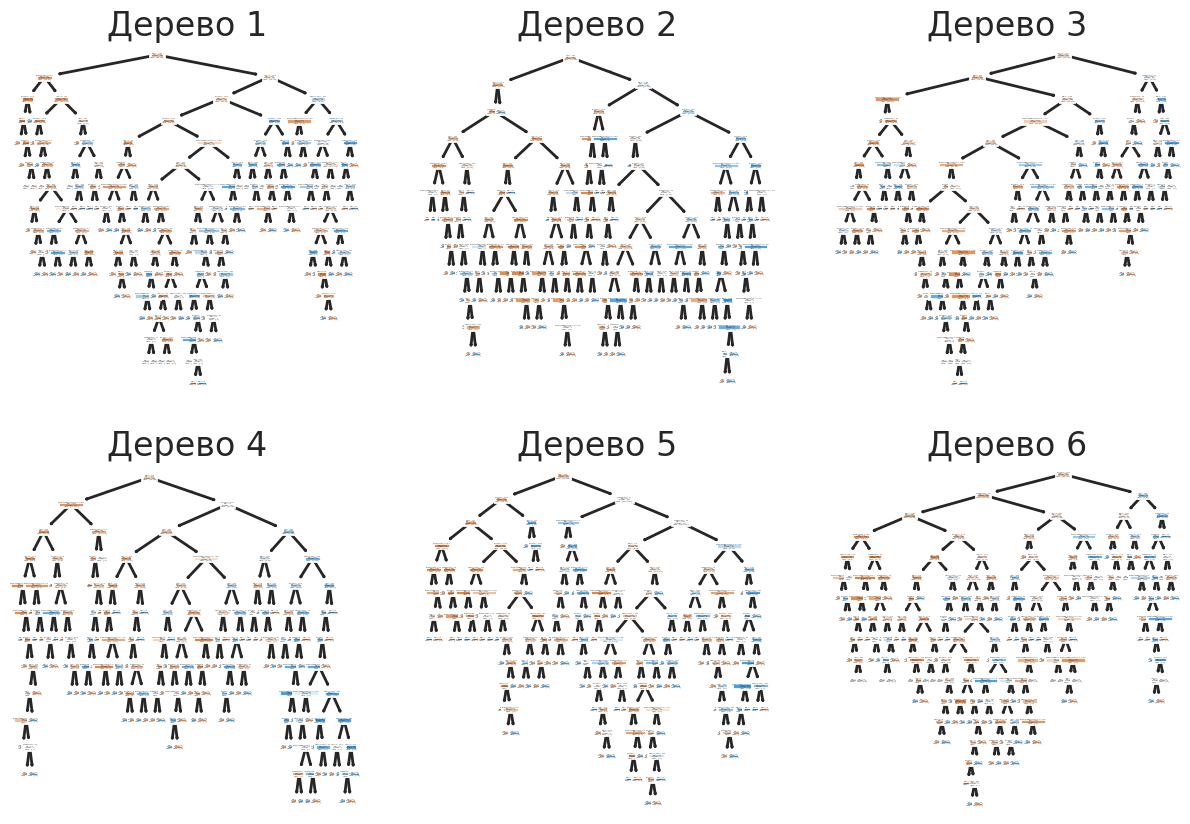

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i in range(6):
    plot_tree(clf_forest.estimators_[i],
              feature_names=X.columns,
              filled=True,
              ax=axes[i])
    axes[i].set_title(f"Дерево {i + 1}")

plt.show()

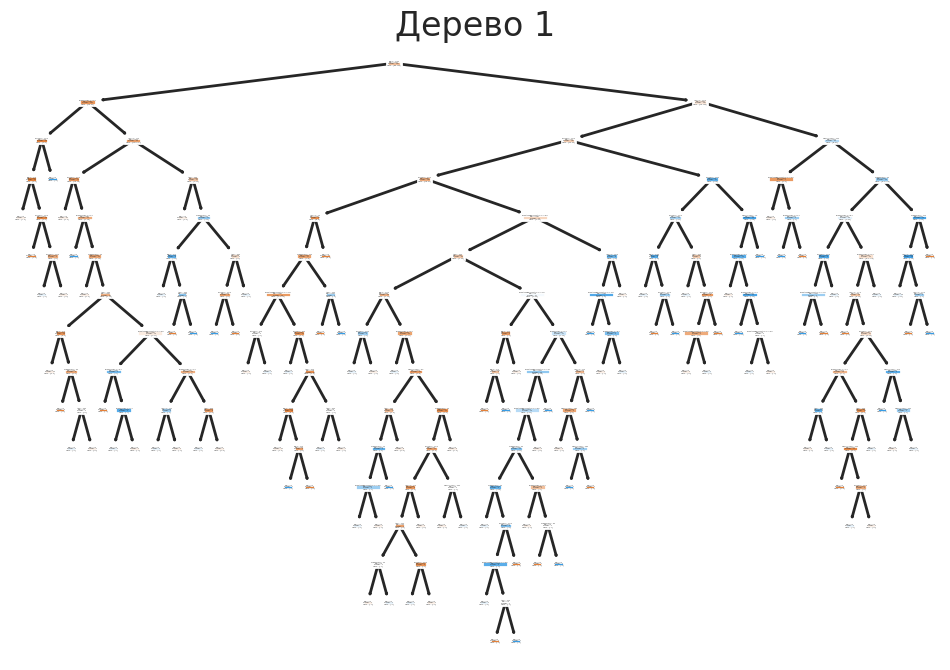

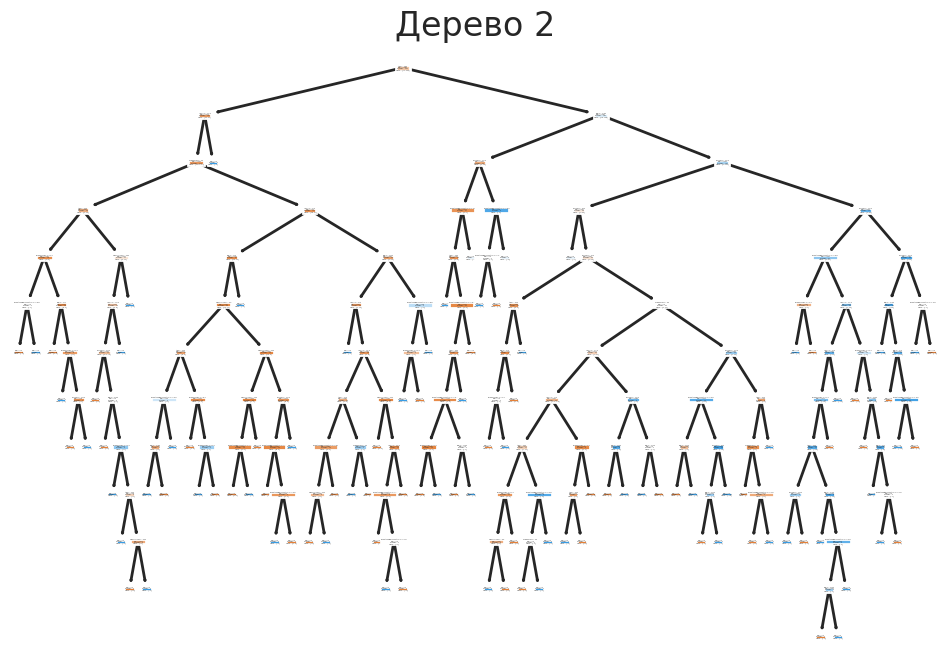

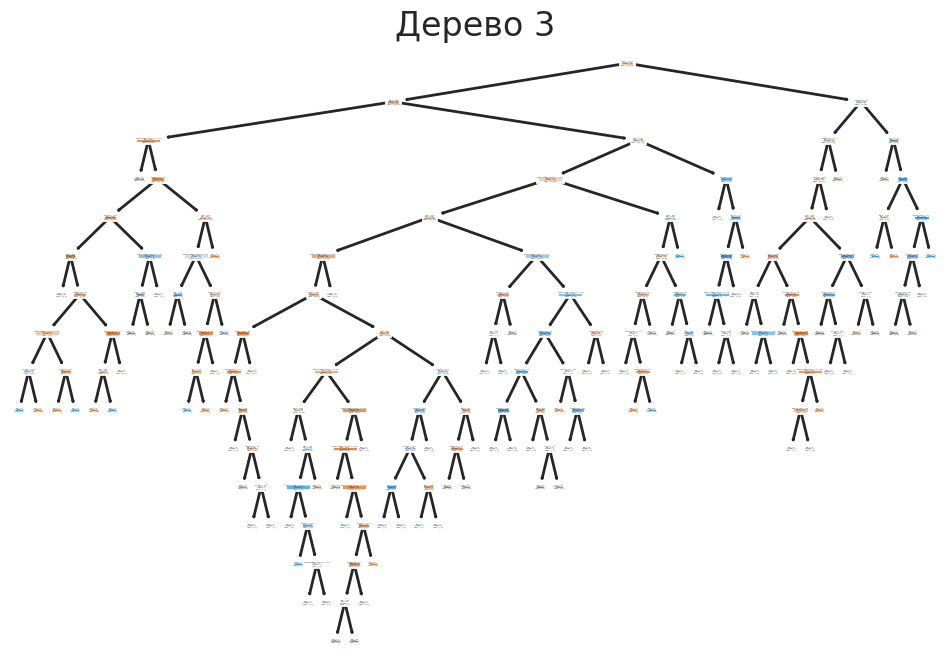

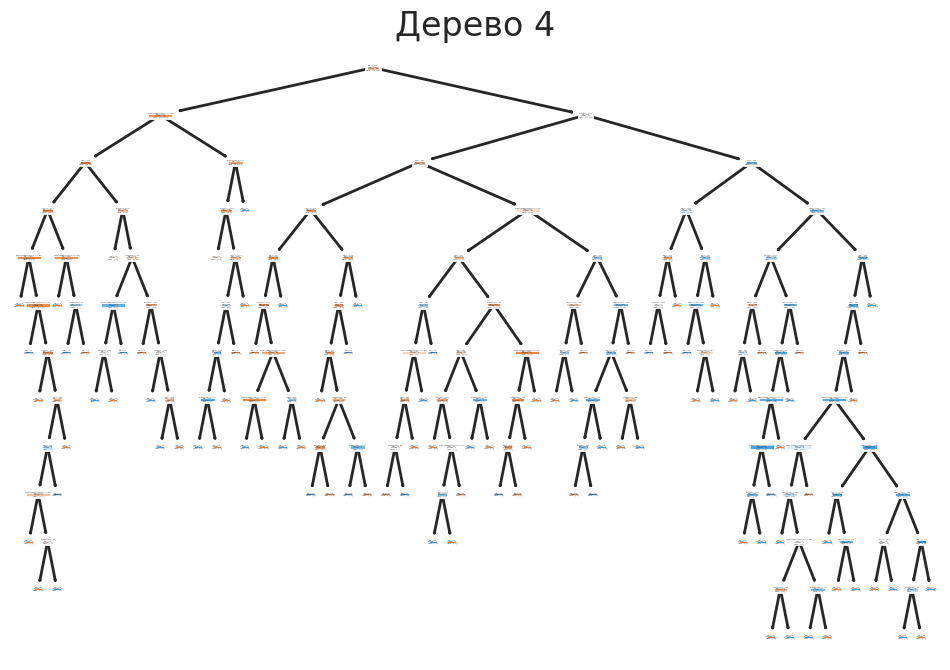

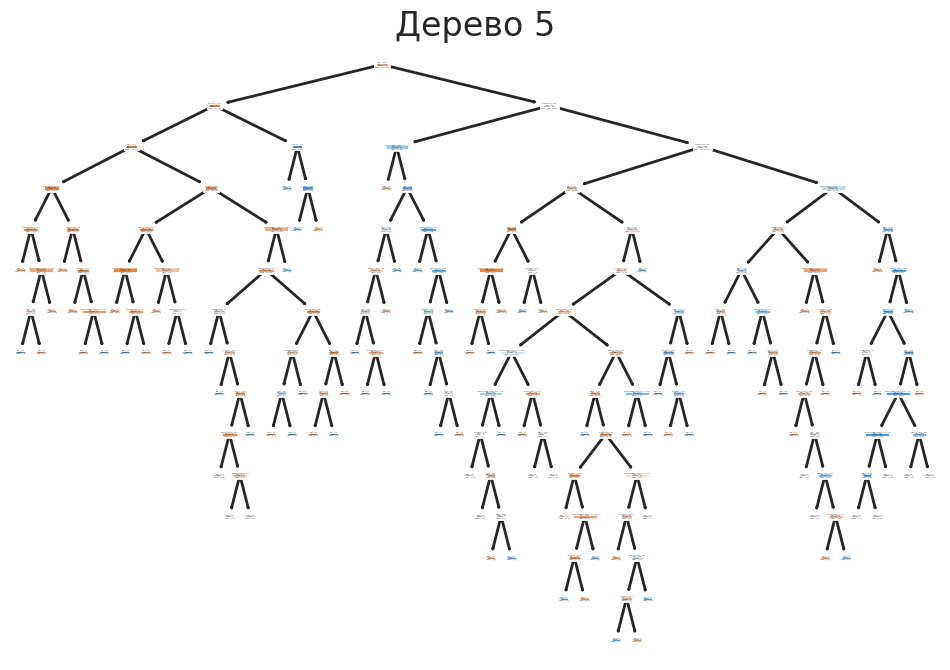

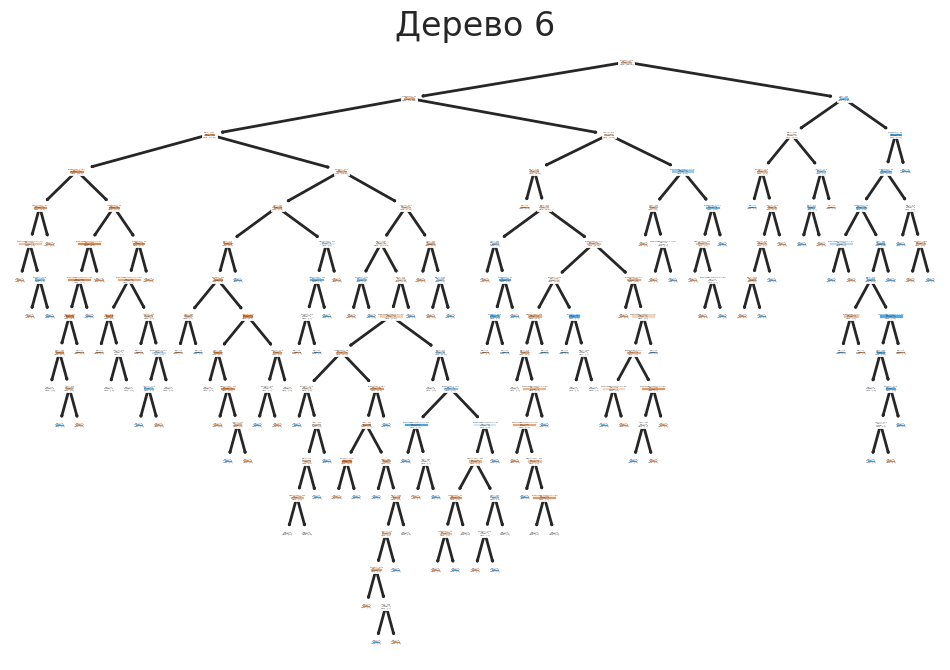

In [ ]:
for i in range(6):
  plt.figure(figsize=(12, 8))
  plot_tree(clf_forest.estimators_[i],
       feature_names=X.columns,
       filled=True)
  plt.title(f"Дерево {i + 1}")
  plt.show()

Как выглядят деревья в решающем дереве? Насколько они отличаются от обученного ранее дерева и друг от друга?

**Вывод:**
Случайный лес позволяет создавать модели, состоящие из множества деревьев, и объединять их предсказания. Параметры каждой модели можно настраивать в зависимости от целей, задавая детализацию дерева. Деревья в лесу различаются, иначе использование леса теряет смысл. Поскольку мы не ограничивали глубину, деревья получаются достаточно глубокими. Они также отличаются от первого дерева большей глубиной, которую мы не ограничивали, а также формой, количеством листьев и ветвей.